<a href="https://colab.research.google.com/github/Rutu-sp/Data-Science-Job-Project/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# get the dataset
df =pd.read_csv('/content/Data Science Job Salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
# shape
df.shape

(607, 11)

In [8]:
# columns and data types
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [9]:
# detect duplications
df.duplicated().sum()

42

In [10]:
# drop duplications
df.drop_duplicates(inplace=True)

In [11]:
# change country names from ISO2 to original names
# There are two features containing country names,
"company_location" and "employee_residence"
!pip install -q country_converter
import country_converter
cc = country_converter.CountryConverter()
df['company_location'] = cc.convert(df['company_location'],
to='name_short')
df['employee_residence'] = cc.convert(df['employee_residence'],
to='name_short')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.4 MB/s eta 0:00:00


In [12]:
# experience level
df['experience_level'].value_counts()

,count
experience_level,
SE,243
MI,208
EN,88
EX,26


In [13]:
df['experience_level'] = df['experience_level'].map({
'SE': 'Senior',
'MI': 'Mid',
'EN': 'Entry',
'EX': 'Executive'})

In [14]:
# employment type
df['employment_type'].value_counts()

,count
employment_type,
FT,546
PT,10
CT,5
FL,4


In [15]:
df['employment_type'] = df['employment_type'].map({
'FT': 'Full-time',
'PT': 'Part-time',
'CT': 'Contract',
'FL': 'Freelance'})

In [16]:
# company size
df['company_size'].value_counts()

,count
company_size,
M,290
L,193
S,82


In [17]:
df['company_size'] = df['company_size'].map({
'S': 'Small',
'M': 'Medium',
'L': 'Large'})

In [18]:
# drop salary and salary_currency features (salary_in_usd is enough to keep on)
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)
# rename salary_in_usd to salary
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [19]:
df['work_year'].value_counts()

,count
work_year,
2022,278
2021,215
2020,72


In [20]:
df['remote_ratio'].value_counts()

,count
remote_ratio,
100,346
0,121
50,98


In [21]:
# renmame remote_ratio to job_type
df.rename(columns={'remote_ratio': 'job_type'}, inplace=True)
# change 100 to remote, 0 to onsite, 50 to hybrid
df['job_type'] = df['job_type'].map({
100: 'remote',
0: 'onsite',
50: 'hybrid',})

In [22]:
df['job_type'].value_counts()

,count
job_type,
remote,346
onsite,121
hybrid,98


In [23]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')

In [24]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,79833,Germany,onsite,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Japan,onsite,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,109024,United Kingdom,hybrid,United Kingdom,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,Honduras,onsite,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,United States,hybrid,United States,Large


<ipython-input-25-24b212ea8ea8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['salary'])


Text(0.5, 1.0, 'Salary Distribution')

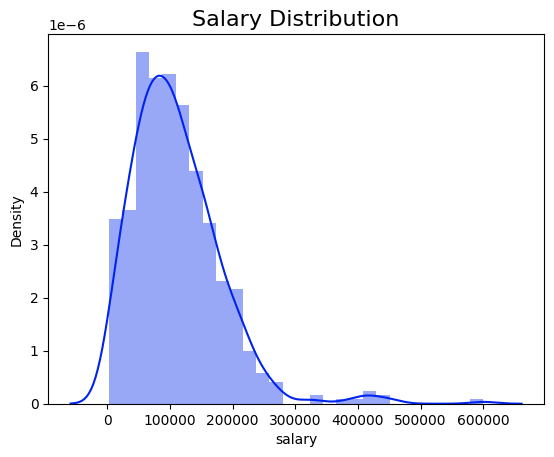

In [25]:
# Salary distribution
sns.set_palette('winter')
ax = sns.distplot(df['salary'])
ax.set_title('Salary Distribution', fontdict={'fontsize': 16})

# The Employees range between the salary package of Rs 100000 to Rs 300000 anually.

In [26]:
# mean salary of employees with different experience levels
mean_s_exp_lv =df.groupby('experience_level')['salary'].mean().sort_values()
mean_s_exp_lv

,salary
experience_level,
Entry,61643.318182
Mid,87792.995192
Senior,138374.880658
Executive,199392.038462


In [27]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Experience Level VS Salary')

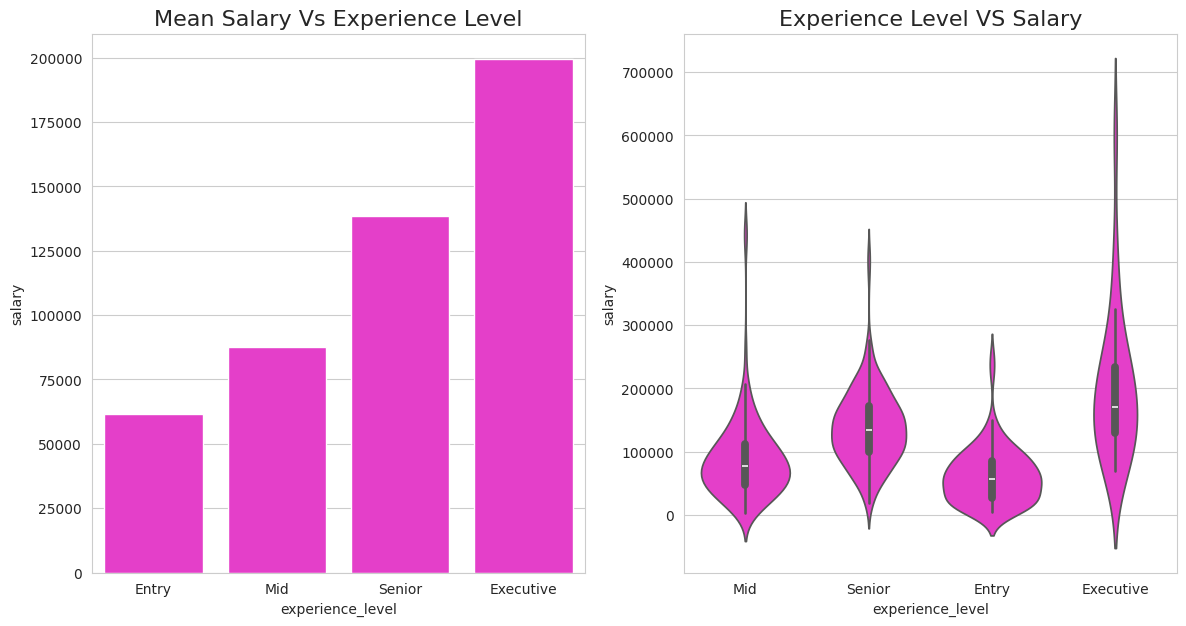

In [28]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_exp_lv.index, y=mean_s_exp_lv)
ax.set_title('Mean Salary Vs Experience Level',
fontdict={'fontsize': 16})
plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='experience_level', y='salary')
ax.set_title('Experience Level VS Salary',
fontdict={'fontsize': 16})


# The Employees with Executive experience level have highest mean salary and those with entry level have lowest mean salary.

In [29]:
# mean salary of employees with different employment types
mean_s_emp_type =df.groupby('employment_type')['salary'].mean().sort_values()
mean_s_emp_type

,salary
employment_type,
Part-time,33070.500000
Freelance,48000.000000
Full-time,111811.838828
Contract,184575.000000


Text(0.5, 1.0, 'Employment Type VS Salary')

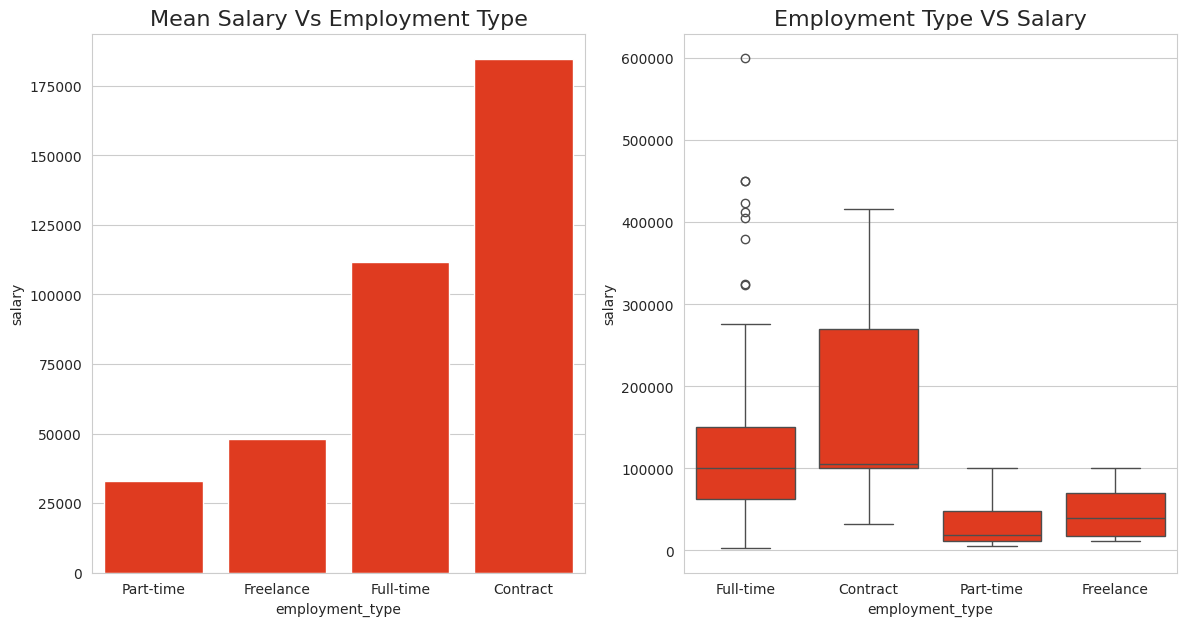

In [30]:
plt.figure(figsize=(14, 7))
sns.set_palette('autumn')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_emp_type.index, y=mean_s_emp_type)
ax.set_title('Mean Salary Vs Employment Type',
fontdict={'fontsize': 16})
plt.subplot(1, 2, 2)
ax = sns.boxplot(data=df, x='employment_type', y='salary')
ax.set_title('Employment Type VS Salary', fontdict={'fontsize':16})

The employees with employment type of contract have Salary range between
$1,00,000 to $3,00,000 and highest mean salary of $180000 while the employees with Part time employment type have Salary range of $0 to $75000 and the lowest salary mean.

In [31]:
# mean salary of employees from different company sizes
mean_s_cmp_size =df.groupby('company_size')['salary'].mean().sort_values()
mean_s_cmp_size

,salary
company_size,
Small,77872.097561
Medium,114807.079310
Large,118213.880829


Text(0.5, 1.0, 'Company Size VS Salary')

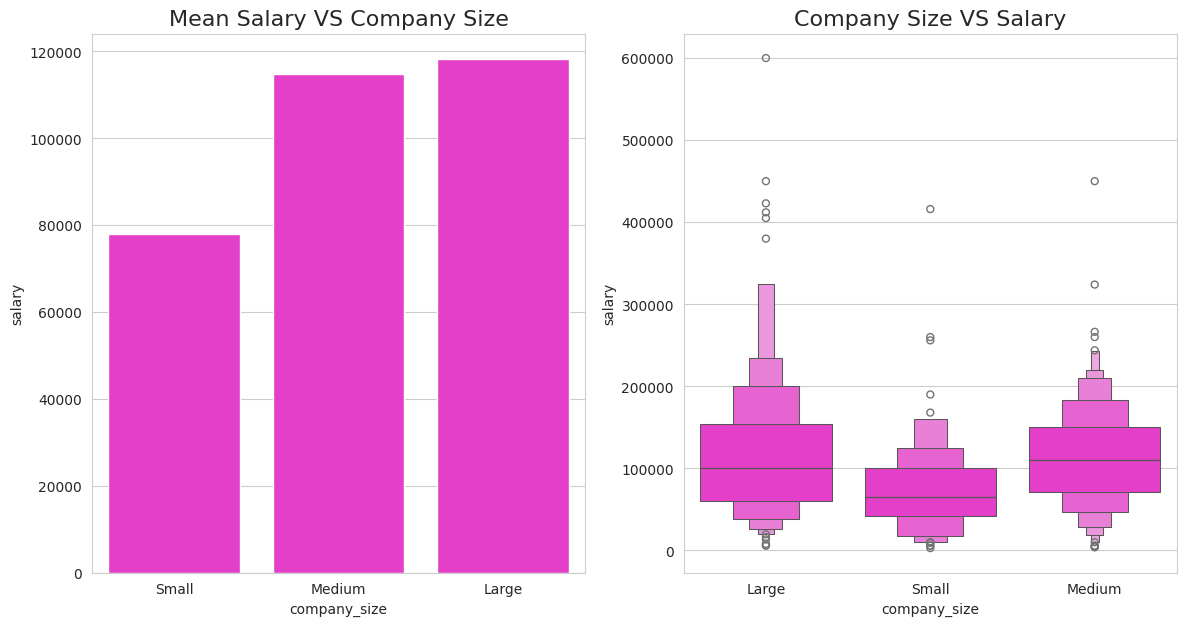

In [32]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_cmp_size.index, y=mean_s_cmp_size)
ax.set_title('Mean Salary VS Company Size',
fontdict={'fontsize': 16})
plt.subplot(1, 2, 2)
sns.set_palette('Set2')
ax = sns.boxenplot(data=df, x='company_size', y='salary')
ax.set_title('Company Size VS Salary', fontdict={'fontsize':16})

In [33]:
# mean salary of employees with different job types
mean_s_jtype =df.groupby('job_type')['salary'].mean().sort_values()
mean_s_jtype


,salary
job_type,
hybrid,80721.897959
onsite,105785.404959
remote,120763.190751


Text(0.5, 1.0, 'Job Type VS Salary')

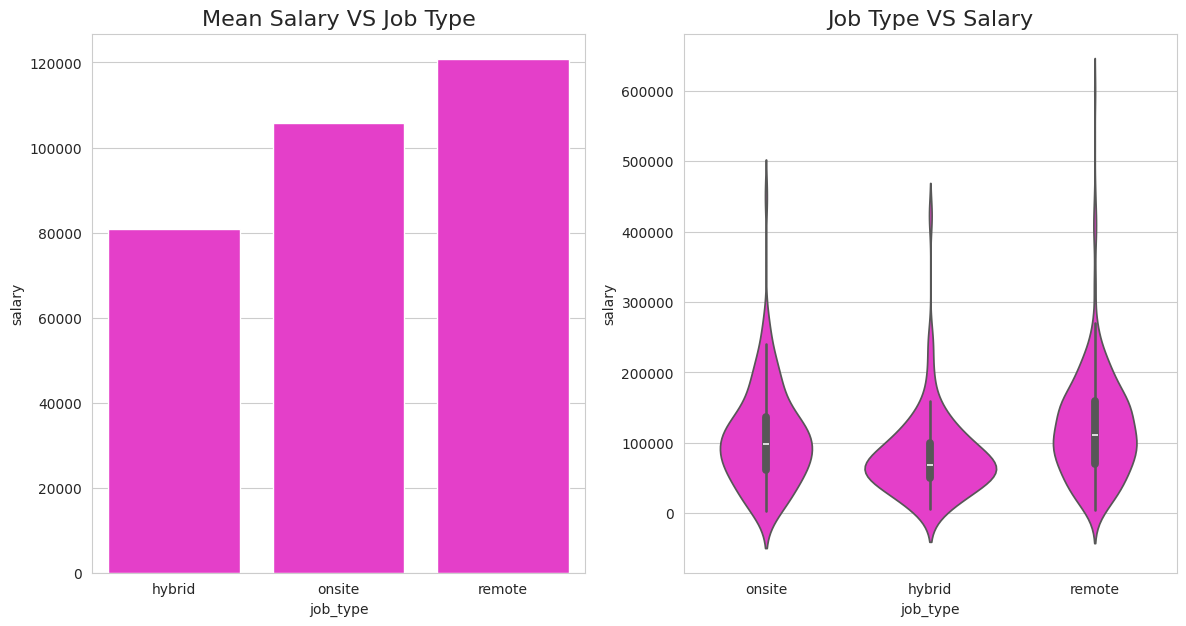

In [34]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_jtype.index, y=mean_s_jtype)
ax.set_title('Mean Salary VS Job Type', fontdict={'fontsize':
16})
plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='job_type', y='salary')
ax.set_title('Job Type VS Salary', fontdict={'fontsize': 16})

Text(0.5, 1.0, 'Job Type & Company Size VS Salary')

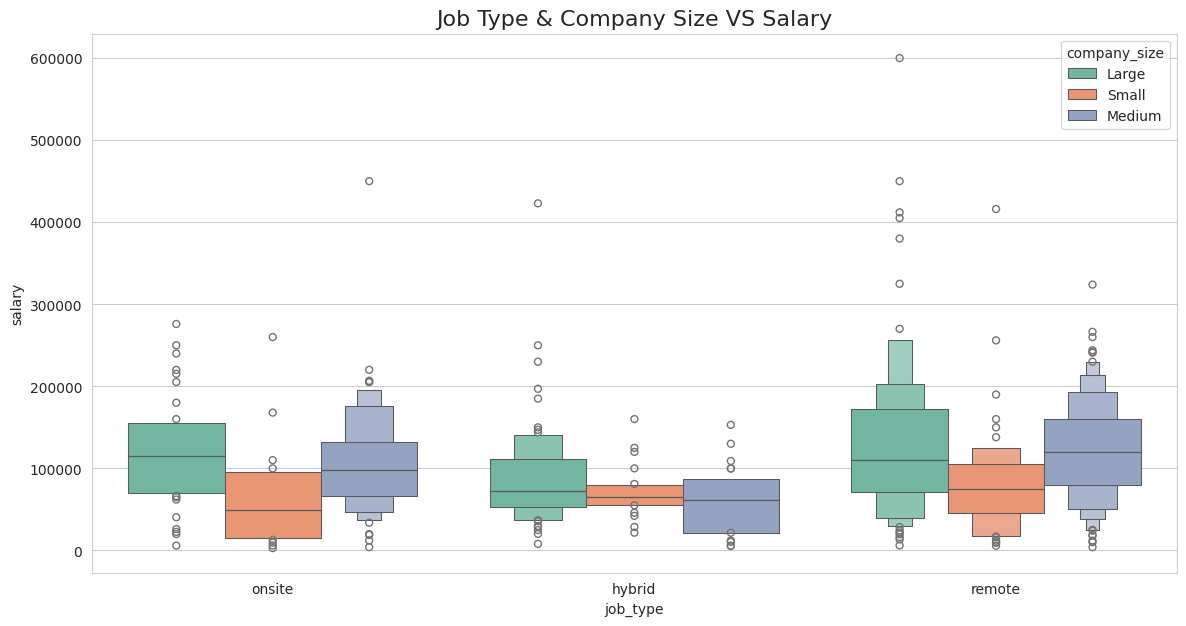

In [35]:
# job type and company size VS salary
plt.figure(figsize=(14, 7))
sns.set_palette('Set2')
ax = sns.boxenplot(data=df, x='job_type', y='salary',
hue='company_size')
ax.set_title('Job Type & Company Size VS Salary',
fontdict={'fontsize': 16})

Text(0, 0.5, '')

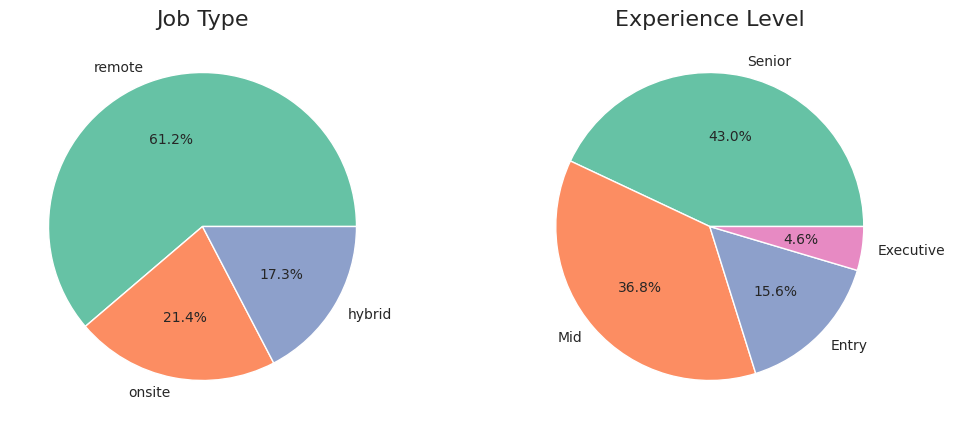

In [36]:
plt.figure(figsize=(12, 5))
sns.set_palette('Set2')
# job types
plt.subplot(1,2,1)
ax = df['job_type'].value_counts().plot(kind='pie',
autopct='%1.1f%%')
ax.set_title('Job Type', fontdict={'fontsize': 16})
ax.set_ylabel('')
# experience levels
plt.subplot(1,2,2)
ax = df['experience_level'].value_counts().plot(kind='pie',
autopct='%1.1f%%')
ax.set_title('Experience Level', fontdict={'fontsize': 16})
ax.set_ylabel('')

In [37]:
# top 10 data science roles according to mean salary
top_ds_roles =df.groupby('job_title')['salary'].mean().sort_values(ascending=False)
# ignore those ds roles which happened only once
top_ds_roles_ =pd.Series(data=list(top_ds_roles.index)).apply(lambda x: x if list(df['job_title']).count(x) > 1 else 0)
top_ds_roles_that_happened_gt_1 = top_ds_roles_[top_ds_roles_!= 0][:9]
top_ds_roles_that_happened_gt_1 =top_ds_roles[top_ds_roles_that_happened_gt_1]
top_ds_roles_that_happened_gt_1

,salary
job_title,
Principal Data Engineer,328333.333333
Financial Data Analyst,275000.000000
Principal Data Scientist,215242.428571
Director of Data Science,195074.000000
Data Architect,177873.909091
Applied Data Scientist,175655.000000
Analytics Engineer,175000.000000
Head of Data,160162.600000
Machine Learning Scientist,158412.500000


Text(0.5, 1.0, 'Top 10 data science roles with highest number of openings')

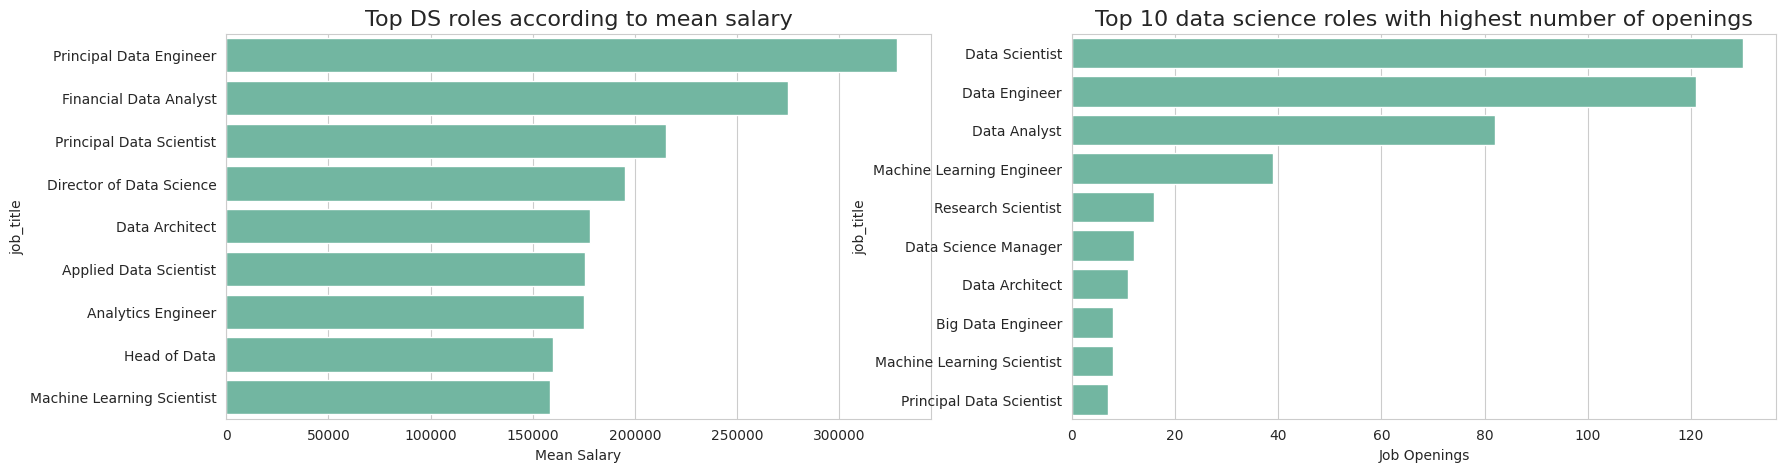

In [38]:
plt.figure(figsize=(20, 5))
# top 10 data science roles according to mean salary
plt.subplot(1, 2, 1)
top_ds_roles = top_ds_roles_that_happened_gt_1
ax = sns.barplot(y=top_ds_roles.index, x=top_ds_roles)
ax.set_xlabel('Mean Salary')
ax.set_title('Top DS roles according to mean salary',
fontdict={'fontsize': 16})
# top 10 data science roles with highest number of openings
plt.subplot(1, 2, 2)
top_dr = df['job_title'].value_counts()[:10]
ax = sns.barplot(x=top_dr, y=top_dr.index)
ax.set_xlabel('Job Openings')
ax.set_title('Top 10 data science roles with highest number of openings', fontdict={'fontsize': 16})

In [39]:
# top 10 company-locations according to mean salary
top_cmp_locations =df.groupby('company_location')['salary'].mean().sort_values(ascending=False)[:10]
top_cmp_locations

,salary
company_location,
Russia,157500.000000
United States,144292.993711
New Zealand,125000.000000
Israel,119059.000000
Japan,114127.333333
Australia,108042.666667
Canada,100121.857143
Iraq,100000.000000
United Arab Emirates,100000.000000


Text(0.5, 1.0, 'Top 10 countries having most DS job opportunities')

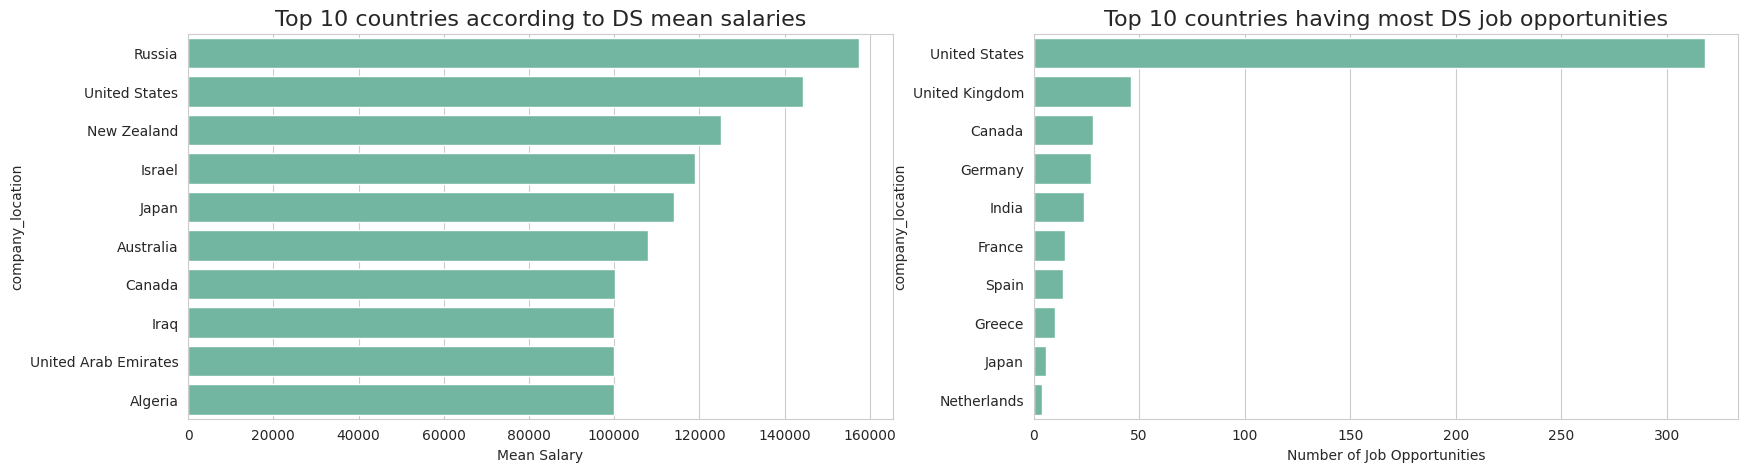

In [40]:
plt.figure(figsize=(20, 5))
# top 10 company-locations according to mean salary
plt.subplot(1, 2, 1)
ax = sns.barplot(y=top_cmp_locations.index,
x=top_cmp_locations)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 countries according to DS mean salaries',
fontdict={'fontsize': 16})
# top 10 company-locations having most job opportunities
top_cl = df['company_location'].value_counts()[:10]
plt.subplot(1, 2, 2)
ax = sns.barplot(x=top_cl, y=top_cl.index)
ax.set_xlabel('Number of Job Opportunities')
ax.set_title('Top 10 countries having most DS job opportunities', fontdict={'fontsize': 16})

In [41]:
# top 10 employee-residence according to mean salary
top_emp_residence =df.groupby('employee_residence')['salary'].mean().sort_values(ascending=False)[:10]
top_emp_residence

,salary
employee_residence,
Malaysia,200000.000000
Puerto Rico,160000.000000
United States,150094.918644
New Zealand,125000.000000
Switzerland,122346.000000
Australia,108042.666667
Russia,105750.000000
Singapore,104176.500000
Japan,103537.714286


Text(0.5, 0, 'Job Openings')

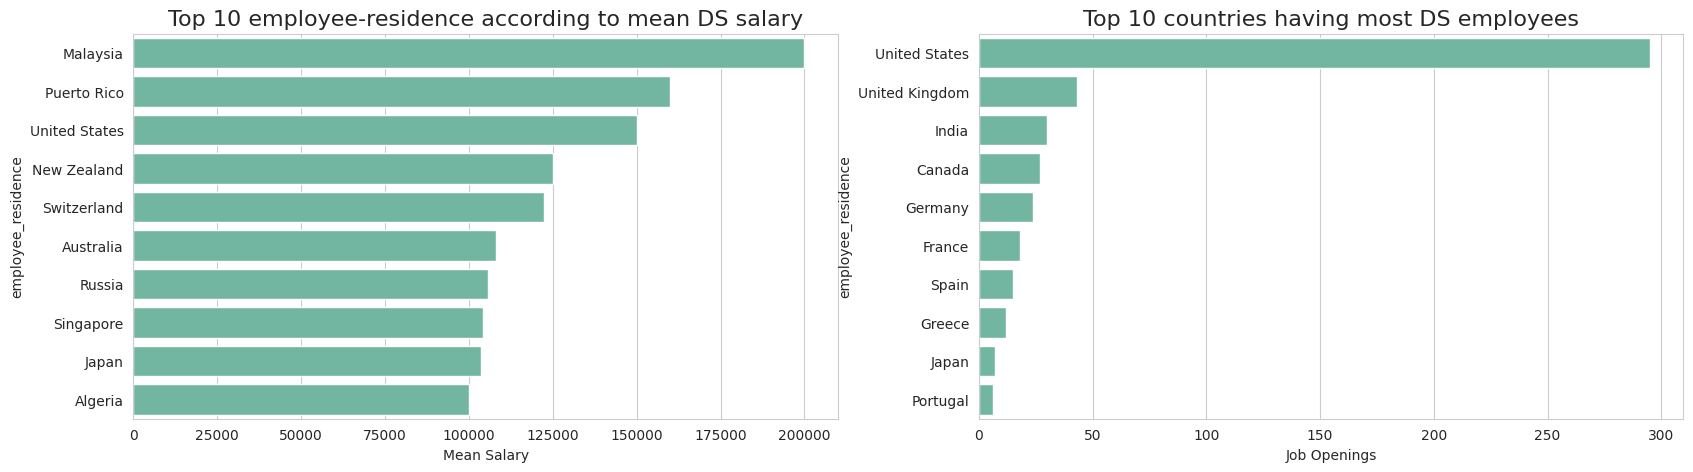

In [42]:
plt.figure(figsize=(20, 5))
# top 10 employee-residence according to mean salary
plt.subplot(1,2,1)
ax = sns.barplot(y=top_emp_residence.index,
x=top_emp_residence)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 employee-residence according to mean DS salary', fontdict={'fontsize': 16})
# top 10 employee-residence according to number of job openings
plt.subplot(1,2,2)
top_er = df['employee_residence'].value_counts()[:10]
ax = sns.barplot(x=top_er, y=top_er.index)
ax.set_title('Top 10 countries having most DS employees',fontdict={'fontsize': 16})
ax.set_xlabel('Job Openings')

Text(0.5, 1.0, 'Company Size VS Job Types Counts')

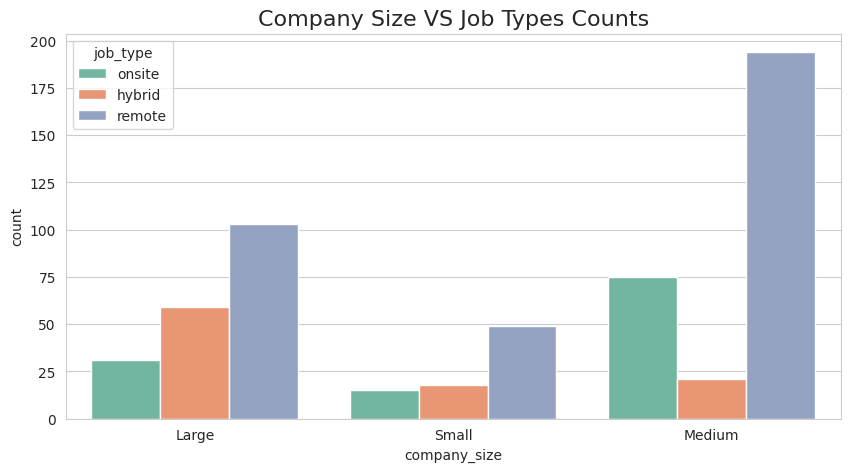

In [43]:
plt.figure(figsize=(10, 5))
sns.set_palette('Set2')
ax = sns.countplot(data=df, x='company_size', hue='job_type')
ax.set_title('Company Size VS Job Types Counts',
fontdict={'fontsize': 16})